# 6 A neurological model

## 6.1 Experimenting with the FHN model

We beschouwen het meest simplistische model van een neuron, het FHN model:

$$V' = \frac{1}{\epsilon}(-w + V(1-V)(V-a)+I_{ext})$$

$$w' = V - \gamma w$$

met a = 0.1,$\epsilon = 0.01$ en $\gamma = 1$. $I_{ext}$ is de externe stimulus die we het systeem gaan geven.

### 6.1.1 experimenten met het FitzHugh–Nagumo (FHN) model: stroomstoot

Eerst geven we een zeer kleine stimulus $I_{ext} = 0.01$ en vergelijken die met het geven van een stimulus $I_{ext} = 0.03$:

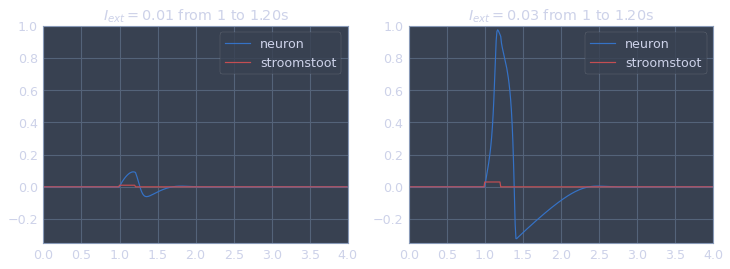

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
T = np.arange(0,4,0.01)

def vergelijkingen(V,w,I,a=0.1,gamma=1,epsilon=0.01):
    V_ = (1/epsilon)*(-w + V*(1 - V)*(V - a) + I)
    w_ = V - gamma*w
    return [V_,w_]

def euler(start_puls,stop_puls,sterkte_puls,stapgrootte=0.01,periode=len(T)):
    v = []
    w = []
    i_ext = []
    V,W = 0,0 #startvoltage en ander ding
    for i in range(len(T)):
        v.append(V)
        w.append(W)
        if start_puls <= T[i] and T[i] <= stop_puls:
            V += stapgrootte*vergelijkingen(v[-1],w[-1],sterkte_puls)[0]
            W += stapgrootte*vergelijkingen(v[-1],w[-1],sterkte_puls)[1]
            i_ext.append(sterkte_puls)
        else:
            V += stapgrootte*vergelijkingen(v[-1],w[-1],0)[0]
            W += stapgrootte*vergelijkingen(v[-1],w[-1],0)[1]
            i_ext.append(0)
    return v,w,i_ext

v,w,i_ext = euler(1,1.20,0.01)
ax1.set_xlim(0,4)
ax1.set_ylim(-0.35,1)
ax1.plot(T,v,label='neuron')
ax1.plot(T,i_ext,label='stroomstoot',color='r')
ax1.set_title('$I_{ext} = 0.01$ from 1 to 1.20s')
ax1.legend()

v_,w_,i_ext_ = euler(1,1.20,0.03)
ax2.set_xlim(0,4)
ax2.set_ylim(-0.35,1)
neuron = ax2.plot(T,v_,label='neuron')  
stroombron = ax2.plot(T,i_ext_,label='stroomstoot',color='r')
ax2.set_title('$I_{ext} = 0.03$ from 1 to 1.20s')
ax2.legend()

plt.show()

### 6.1.2 experimenten met het FitzHugh–Nagumo (FHN) model: constante stroom

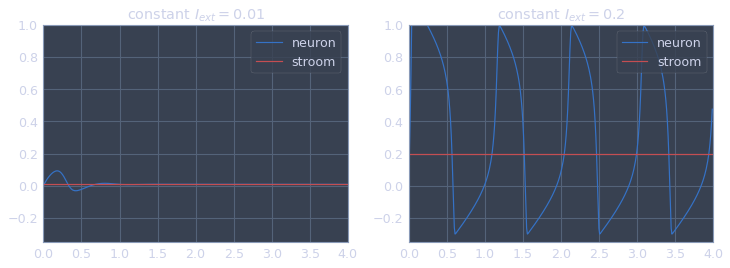

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
T = np.arange(0,4,0.01)

v,w,i_ext = euler(0,4,0.01)
ax1.set_xlim(0,4)
ax1.set_ylim(-0.35,1)
ax1.plot(T,v,label='neuron')
ax1.plot(T,i_ext,label='stroom',color='r')
ax1.set_title('constant $I_{ext} = 0.01$')
ax1.legend()

v_,w_,i_ext_ = euler(0,4,0.2)
ax2.set_xlim(0,4)
ax2.set_ylim(-0.35,1)
ax2.plot(T,v_,label='neuron')  
ax2.plot(T,i_ext_,label='stroom',color='r')
ax2.set_title('constant $I_{ext} = 0.2$')
ax2.legend()

plt.show()

## 6.2 Two neurons coupled to each other

Nu zullen we 2 neuronen koppelen aan elkaar hierbij worden ze gekoppeld aan de hand van een weerstand, met dus de stroom van neuron 1 naar neuron 2 gegeven door:

$$I_{coupling:2 \rightarrow 1} = \frac{V_2-V_1}{R}$$

En analoog van neuron 2 naar neuron 1:
$$I_{coupling:1 \rightarrow 2} = \frac{V_1-V_2}{R}$$

De volledige vergelijking voor de 2-neuronen koppeling is:

$$V_1' = \frac{1}{\epsilon}(-w_1 + V_1(1-V_1)(V_1-a)+ I_{coupling:2 \rightarrow 1} + I_{ext})$$

$$w_1' = V_1 - \gamma w_1$$

$$V_2' = \frac{1}{\epsilon}(-w_2 + V_2(1-V_2)(V_2-a)+ I_{coupling:1 \rightarrow 2})$$

$$w_2' = V_2 - \gamma w_2$$

We nemen $\epsilon = 0.008$, R=45,$\gamma = 0.5$,a=0.1 en $I_{ext} = 0.025$

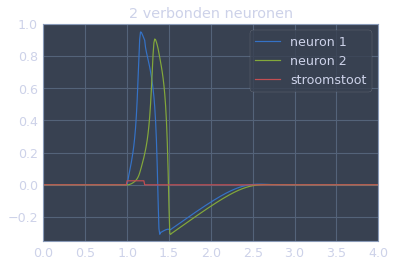

In [4]:
def vergelijkingen(V_1,w_1,V_2,w_2,I_ext,R=45,a=0.1,gamma=0.5,epsilon=0.008):
    
    I_c21 = (V_2 - V_1)/R
    I_c12 = (V_1 - V_2)/R
    
    V_1_ = (1/epsilon)*(-w_1 + V_1*(1 - V_1)*(V_1 - a) + I_c21 + I_ext)
    w_1_ = V_1 - gamma*w_1
    
    V_2_ = (1/epsilon)*(-w_2 + V_2*(1 - V_2)*(V_2 - a) + I_c12)
    w_2_ = V_2 - gamma*w_2
    
    return [V_1_,w_1_,V_2_,w_2_]


def euler(start_puls,stop_puls,sterkte_puls,stapgrootte=0.01,periode=len(T)):
    v_1 = []
    w_1 = []
    v_2 = []
    w_2 = []
    i_ext = []
    V_1,W_1,V_2,W_2 = 0,0,0,0 #startvoltage en ander ding
    for i in range(len(T)):
        v_1.append(V_1)
        w_1.append(W_1)
        v_2.append(V_2)
        w_2.append(W_2)
        if start_puls <= T[i] and T[i] <= stop_puls:
            V_1 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],sterkte_puls)[0]
            W_1 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],sterkte_puls)[1]
            V_2 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],sterkte_puls)[2]
            W_2 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],sterkte_puls)[3]
            i_ext.append(sterkte_puls)
        else:
            V_1 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],0)[0]
            W_1 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],0)[1]
            V_2 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],0)[2]
            W_2 += stapgrootte*vergelijkingen(v_1[-1],w_1[-1],v_2[-1],w_2[-1],0)[3]
            i_ext.append(0)
    return v_1,w_1,v_2,w_2,i_ext

v_1,w_1,v_2,w_2,i_ext = euler(1,1.20,0.025)
plt.xlim(0,4)
plt.ylim(-0.35,1)
plt.plot(T,v_1,label='neuron 1')
plt.plot(T,v_2,label='neuron 2')
plt.plot(T,i_ext,label='stroomstoot')
plt.title('2 verbonden neuronen')
plt.legend()
plt.show()

## 6.3 Dynamics of the FHN model

We zullen nu de nullclines van het systeem schetsen, door $V' = 0$ en $w' = 0$ te stellen krijgen we:
$$w = V(1-V)(V-a)$$

$$w = \frac{1}{\gamma}V$$

### 6.3.1 Teken deze nullclines

Waar is het equilibrium, en welk type?:
Deze 2 zien er als volgt uit:

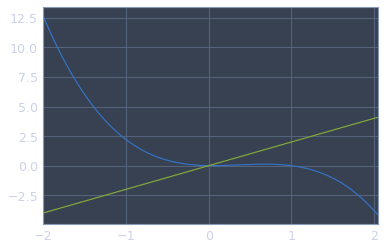

In [63]:

V = np.arange(-2,2.05,0.01)
w = V*(1-V)*(V-0.1)
w_ = 2*V
plt.plot(V,w)
plt.plot(V,w_)
plt.xlim(-2,2.05)


plt.show()

En hebben dus de waarde V = 0. We kijken of deze stabiel zijn door ze in te vullen in de afgeleide van de vergelijking:
$$\frac{1}{\epsilon}( (1-V)(V-a) - V(V-a) + V(1-V) )$$

Wat ingevuld de waarde -0.1 oplevert, dus een stabiel evenwicht.
Nu tekenen we de change vectors voor test punten in de Vw-ruimte:

### 6.3.2 Now add to your figure the behaviour of the system

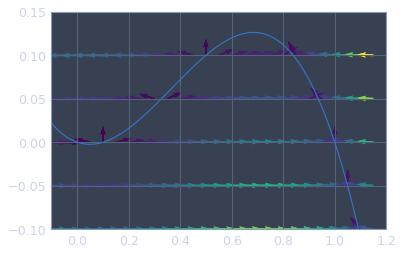

In [106]:
epsilon = 0.01
gamma = 1
a=0.1
V,W = np.meshgrid(np.arange(-0.1,1.2,0.05),np.arange(-0.1,0.15,0.05))
V_ = (1/epsilon)*(-W + V*(1 - V)*(V - a))
w_ = V - gamma*W
O = np.sqrt(V_**2 + w_**2)
O[ O == 0] = 1 #vermijden dat er door 0 gedeeld wordt
V_ /= O
w_ /= O
V_graf = np.arange(-1,2,0.01)
w_graf = V_graf*(1-V_graf)*(V_graf-0.1)

plt.quiver(V,W,V_,w_,O)
plt.quiver(V,W,V_,w_,O)
plt.plot(V_graf,w_graf)
plt.xlim(-0.1,1.2)
plt.ylim(-0.1,0.15)

plt.show()

### 6.3.3 experiment by repeating the experiment of part one